# Task 6 : Fraud Transaction Detection

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


as they have already mentioned in the description of this dataset.... this doesn't make any sense to us as it is the output from Principal component analysis.

In [3]:
def explore_data(df):
    # Get the basic information about the DataFrame
    print("Data Shape:")
    print(df.shape)
    
    print("\nData Columns:")
    print(df.columns)
    
    print("\nData Info:")
    print(df.info())
    
    print("\nData Summary:")
    print(df.describe())
    
    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Check for duplicate rows
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    
    # Explore unique values in categorical columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    if len(categorical_cols) > 0:
        print("\nUnique Values in Categorical Columns:")
        for col in categorical_cols:
            print(f"\n{col}:")
            print(df[col].unique())
    
    # Explore numerical columns
    numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
    if len(numerical_cols) > 0:
        print("\nNumerical Column Statistics:")
        for col in numerical_cols:
            print(f"\n{col}:")
            print(f"Minimum: {df[col].min()}")
            print(f"Maximum: {df[col].max()}")
            print(f"Mean: {df[col].mean()}")
            print(f"Median: {df[col].median()}")
            print(f"Standard Deviation: {df[col].std()}")
    
    
explore_data(df)

Data Shape:
(284807, 31)

Data Columns:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 1

In [4]:
print("Original number of rows:", len(df))
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df))

Original number of rows: 284807
Number of rows after removing duplicates: 283726


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
import numpy as np

def scale_columns(dataframe):
    # Check if scaling is needed
    scale_needed = False
    features_to_scale = []
    for col in dataframe.columns:
        if dataframe[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
            mean = dataframe[col].mean()
            std = dataframe[col].std()
            if np.abs(mean) > 1 or np.abs(std) > 1:
                scale_needed = True
                features_to_scale.append((col, mean, std))

    if not scale_needed:
        print("No scaling needed.") 
        return

    # Prompt the user for scaling option
    print("Scaling is recommended for the following reasons:")
    for feature in features_to_scale:
        print(f"- Feature: {feature[0]}, Mean: {feature[1]}, Standard Deviation: {feature[2]}")
    print("- Data has numerical features with mean or standard deviation larger than 1.")
    print("Available scaling options:")
    print("1. Min-Max Scaling")
    print("2. Standard Scaling")
    print("3. Robust Scaling")
    print("4. Max Abs Scaling")
    print("5. Log Transformation")
    print("6. Power Transformation")
    scaling_option = int(input("Enter the scaling option number (0 to skip scaling): "))

    if scaling_option == 0:
        return dataframe

    # Prompt the user to select columns to scale
    print("\nAvailable numerical columns:")
    numerical_columns = dataframe.select_dtypes(include=[np.float64, np.float32, np.int64, np.int32]).columns
    for col in numerical_columns:
        print(col)
    column_choice = input("Enter 'all' to select all columns or provide a comma-separated list of column names to scale: ")

    if column_choice.lower() == 'all':
        columns = numerical_columns
    else:
        columns = [col.strip() for col in column_choice.split(",")]

    scaled_data = dataframe.copy()

    if scaling_option == 1:
        scaler = MinMaxScaler()
        scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    elif scaling_option == 2:
        scaler = StandardScaler()
        scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    elif scaling_option == 3:
        scaler = RobustScaler()
        scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    elif scaling_option == 4:
        scaler = MaxAbsScaler()
        scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
    elif scaling_option == 5:
        scaled_data[columns] = np.log(scaled_data[columns])
    elif scaling_option == 6:
        power = float(input("Enter the power for power transformation: "))
        scaled_data[columns] = np.power(scaled_data[columns], power)
    else:
        print("Invalid scaling option selected.")

    return scaled_data

df = scale_columns(df)
df.head()

Scaling is recommended for the following reasons:
- Feature: Time, Mean: 94811.07759951502, Standard Deviation: 47481.047890619506
- Feature: V1, Mean: 0.005917149836165761, Standard Deviation: 1.948026141625471
- Feature: V2, Mean: -0.0041347556281216905, Standard Deviation: 1.6467029642463507
- Feature: V3, Mean: 0.0016131193558786181, Standard Deviation: 1.5086819162059164
- Feature: V4, Mean: -0.0029663077203488635, Standard Deviation: 1.4141840144475144
- Feature: V5, Mean: 0.0018275601130338598, Standard Deviation: 1.3770082792800886
- Feature: V6, Mean: -0.001139488189738493, Standard Deviation: 1.331930591715164
- Feature: V7, Mean: 0.0018006917653071734, Standard Deviation: 1.2276638954422558
- Feature: V8, Mean: -0.0008544525734540372, Standard Deviation: 1.1790544275788069
- Feature: V9, Mean: -0.0015961996217021513, Standard Deviation: 1.0954924810736155
- Feature: V10, Mean: -0.0014407104850314848, Standard Deviation: 1.0764073501381102
- Feature: V11, Mean: 0.000201757639

Enter the scaling option number (0 to skip scaling):  1



Available numerical columns:
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


Enter 'all' to select all columns or provide a comma-separated list of column names to scale:  all


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [6]:
scale_columns(df)

No scaling needed.


## now lets see the Imbalance in the Target variable...

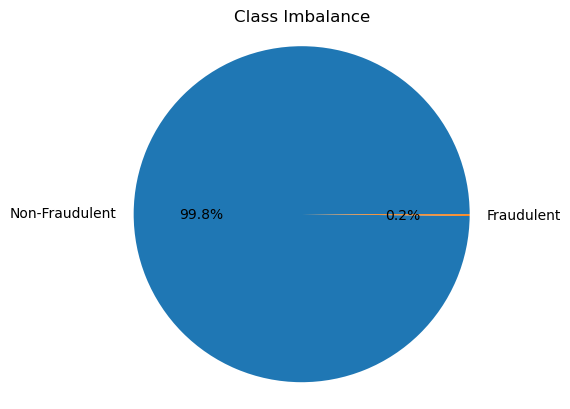

In [7]:
import matplotlib.pyplot as plt

labels = ['Non-Fraudulent', 'Fraudulent']
counts = [df['Class'].value_counts()[0], df['Class'].value_counts()[1]]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Class Imbalance')
plt.show()

## And now may be, Let us handle the Class Imbalance using Random Under Sampling...

In [8]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

def examine_dataset(df, target_column):
    """
    Examine the dataset to check if there is an imbalance in the target column.

    Parameters:
        - df (pandas DataFrame): The input DataFrame.
        - target_column (str): The name of the target column.

    Returns:
        - bool: True if the dataset is imbalanced, False otherwise.
    """
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0

def handle_imbalanced_data(df, target_column):
    """
    Handle imbalanced pandas DataFrame based on user-selected option.

    Parameters:
        - df (pandas DataFrame): The input DataFrame.
        - target_column (str): The name of the target column.

    Returns:
        - pandas DataFrame: The balanced DataFrame.
    """
    imbalance = examine_dataset(df, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return 
    
    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")

    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if choice == '1':
        # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
        # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
        # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
        # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
        # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return df
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return df

    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

    return balanced_df


df = handle_imbalanced_data(df, 'Class')
df.head()

Class Distribution:
0.0    283253
1.0       473
Name: Class, dtype: int64
Imbalance Ratio: 598.8435517970402
Select an option to handle the imbalanced dataset:
1. Random Oversampling
2. Random Undersampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. ADASYN (Adaptive Synthetic)
5. Proceed without handling


Enter your choice (1-5):  2


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.931982,0.978639,0.742286,0.800444,0.244908,0.760002,0.256201,0.267848,0.780289,0.443634,0.523983,0.187462,0.682874,0.466173,0.659238,0.386566,0.413596,0.717522,0.756268,0.492835,0.585532,0.563687,0.498168,0.658955,0.292696,0.567839,0.553420,0.413439,0.313562,0.021298,0.0
1,0.929233,0.992900,0.753932,0.837290,0.229082,0.755465,0.263467,0.255834,0.787596,0.479981,0.526759,0.202140,0.669818,0.397863,0.639778,0.452429,0.439482,0.711418,0.794629,0.460467,0.574523,0.559301,0.509702,0.670527,0.454537,0.536664,0.519937,0.416509,0.312701,0.001787,0.0
2,0.404654,0.977003,0.766355,0.859159,0.330467,0.760158,0.264606,0.263030,0.786396,0.501470,0.500375,0.214794,0.755291,0.496371,0.614425,0.183175,0.420995,0.744063,0.584040,0.604331,0.579224,0.554605,0.474102,0.665934,0.437716,0.607338,0.336711,0.417955,0.313855,0.000870,0.0
3,0.388791,0.977145,0.768506,0.843898,0.314693,0.764549,0.261318,0.266010,0.785131,0.472575,0.505854,0.253622,0.724620,0.440201,0.648341,0.329400,0.426443,0.738779,0.586240,0.533877,0.578873,0.560121,0.506778,0.664136,0.395292,0.614586,0.373843,0.417150,0.313551,0.001438,0.0
4,0.292033,0.939770,0.766352,0.858966,0.312114,0.771326,0.264522,0.266170,0.789461,0.451236,0.510911,0.320549,0.712212,0.354385,0.661100,0.313222,0.421256,0.740749,0.660340,0.651789,0.584973,0.562896,0.518626,0.667211,0.336845,0.575066,0.389749,0.423275,0.317368,0.003034,0.0


In [9]:
handle_imbalanced_data(df, 'Class')

Class Distribution:
0.0    473
1.0    473
Name: Class, dtype: int64
Imbalance Ratio: 1.0
No imbalance found in the dataset.


## now that the imbalance is taken care of let us proceed to next step - feature importance !!!

Enter the number of features to select:  10


Available feature selection algorithms:
1. Recursive Feature Elimination (RFE)
2. Feature Importance (FI)
3. Lasso Regularization (L1 Regularization)
4. Principal Component Analysis (PCA)
5. Correlation Analysis
6. Proceed without selecting any algorithm


Enter the number corresponding to the algorithm you want to use (or enter 6 to proceed without selection):  4
Enter the name of the target variable:  Class



explained variance ratio : [0.54500804 0.21376967 0.06063256 0.03583797 0.02047001 0.01975266
 0.01782963 0.01512235 0.01430315 0.01175783]

cumulative variance ratio: [0.54500804 0.75877772 0.81941027 0.85524824 0.87571825 0.89547091
 0.91330054 0.9284229  0.94272605 0.95448388]


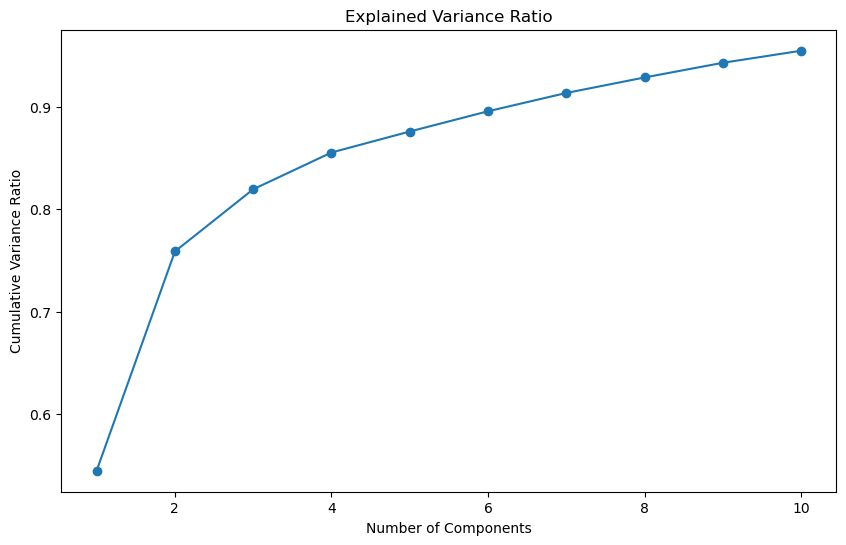

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

def perform_feature_selection(dataframe):
    num_features = int(input("Enter the number of features to select: "))
    
    print("Available feature selection algorithms:")
    print("1. Recursive Feature Elimination (RFE)")
    print("2. Feature Importance (FI)")
    print("3. Lasso Regularization (L1 Regularization)")
    print("4. Principal Component Analysis (PCA)")
    print("5. Correlation Analysis")
    print("6. Proceed without selecting any algorithm")
    
    choice = input("Enter the number corresponding to the algorithm you want to use (or enter 6 to proceed without selection): ")
    
    if choice == "1":  # Recursive Feature Elimination (RFE)
        target_variable = input("Enter the name of the target variable: ")
        
        X = dataframe.drop(target_variable, axis=1)
        y = dataframe[target_variable]
        
        model = RandomForestClassifier()  # Replace with your desired model
        rfe = RFE(estimator=model, n_features_to_select=num_features)
        selected_features = rfe.fit_transform(X, y)
        
        selected_columns = X.columns[rfe.support_].tolist()
        
        # Plotting feature ranking
        feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
        feature_ranking = feature_ranking.sort_values(ascending=True)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_ranking.values, y=feature_ranking.index)
        plt.xlabel('Rank')
        plt.ylabel('Features')
        plt.title('Feature Ranking')
        plt.show()
        
        return selected_columns
    
    elif choice == "2":  # Feature Importance (FI)
        target_variable = input("Enter the name of the target variable: ")
        
        X = dataframe.drop(target_variable, axis=1)
        y = dataframe[target_variable]
        
        model = RandomForestClassifier()  # Replace with your desired model
        model.fit(X, y)
        
        importance_scores = model.feature_importances_
        selected_columns = X.columns[importance_scores.argsort()[-num_features:]].tolist()
        
        # Plotting feature importance
        feature_importance = pd.Series(importance_scores, index=X.columns)
        feature_importance = feature_importance.sort_values(ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance.values, y=feature_importance.index)
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title('Feature Importance')
        plt.show()
        
        return selected_columns
    
    elif choice == "3":  # Lasso Regularization (L1 Regularization)
        target_variable = input("Enter the name of the target variable: ")
        
        X = dataframe.drop(target_variable, axis=1)
        y = dataframe[target_variable]
        
        lasso = Lasso()
        lasso.fit(X, y)
        
        selected_columns = X.columns[lasso.coef_ != 0].tolist()
        
        return selected_columns
    
    elif choice == "4":  # Principal Component Analysis (PCA)
        target_variable = input("Enter the name of the target variable: ")
        
        X = dataframe.drop(target_variable, axis=1)
        y = dataframe[target_variable]
        
        pca = PCA(n_components=num_features)
        selected_features = pca.fit_transform(X)
        
        selected_columns = ['PCA_Component_' + str(i+1) for i in range(num_features)]
        
        # Explained variance ratio plot
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
        
        print(f"\nexplained variance ratio : {explained_variance_ratio}")
        print(f"\ncumulative variance ratio: {cumulative_variance_ratio}")
        
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, num_features+1), cumulative_variance_ratio, marker='o')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Variance Ratio')
        plt.title('Explained Variance Ratio')
        plt.show()
        
        return selected_features
    
    elif choice == "5":  # Correlation Analysis
        target_variable = input("Enter the name of the target variable: ")
        threshold = float(input("Enter the correlation threshold (between 0 and 1): "))
        
        X = dataframe.drop(target_variable, axis=1)
        y = dataframe[target_variable]
        
        corr_matrix = dataframe.corr()
        selected_columns = corr_matrix[target_variable][abs(corr_matrix[target_variable]) > threshold].index.tolist()
        
        # Heatmap of correlations
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
        
        return selected_columns
    
    elif choice == "6":  # Proceed without selecting any algorithm
        return dataframe.columns.tolist()
    
    else:
        print("Invalid choice. Please enter a valid option.")
        return []


Selection = perform_feature_selection(df)

In [11]:
import plotly.graph_objects as go

x = Selection[:, 0]
y = Selection[:, 1]
z = Selection[:, 2]

# Create the scatter trace
scatter_trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(size=5),
    name='Data Points'
)

# Calculate the minimum and maximum values for each component
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
z_min, z_max = z.min(), z.max()

# Create the center line traces
center_line_trace1 = go.Scatter3d(
    x=[x_min, x_max],
    y=[y_min, y_min],
    z=[z_min, z_min],
    mode='lines',
    line=dict(color='red', width=3),
    name='Center Line - Component 1'
)

center_line_trace2 = go.Scatter3d(
    x=[x_min, x_min],
    y=[y_min, y_max],
    z=[z_min, z_min],
    mode='lines',
    line=dict(color='green', width=3),
    name='Center Line - Component 2'
)

center_line_trace3 = go.Scatter3d(
    x=[x_min, x_min],
    y=[y_min, y_min],
    z=[z_min, z_max],
    mode='lines',
    line=dict(color='blue', width=3),
    name='Center Line - Component 3'
)

# Create the figure and add the traces
fig = go.Figure(data=[scatter_trace, center_line_trace1, center_line_trace2, center_line_trace3])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='PCA_Component_1',
        yaxis_title='PCA_Component_2',
        zaxis_title='PCA_Component_3'
    ),
    title='Data in Reduced Dimensional Space'
)

# Show the interactive plot
fig.show()

Having looked at the components.... Lets now build our model and put these principle components to use

## Best Machine Learning Model for the task

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

target_variable = 'Class'  
X = df.drop(target_variable, axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Define the pipeline with model selection
pipeline = Pipeline([
    ('model', SVC())
])

# Define the hyperparameters to tune for each model
parameters = [
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 5, 10]
    },
    {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    },
    {
        'model': [XGBClassifier()],
        'model__learning_rate': [0.1, 0.01],
        'model__max_depth': [3, 5, 7],
        'model__n_estimators': [100, 200]
    },
    {
        'model': [LGBMClassifier()],
        'model__learning_rate': [0.1, 0.01],
        'model__max_depth': [3, 5, 7],
        'model__n_estimators': [100, 200]
    }
]

# Perform grid search to find the best model and hyperparameters
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the results for all models
results = grid_search.cv_results_

"""
# Print the performance details for all models
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("Model:", params)
    print("Mean Accuracy:", mean_score)
    print("-" * 50)

"""

# Print the best model and its hyperparameters
print("Best Model: ", grid_search.best_estimator_)
print("Best Hyperparameters: ", grid_search.best_params_)
print("-" * 50)

# Use the best model for predictions
y_pred = grid_search.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Model Performance:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

X_train shape: (756, 30)
y_train shape: (756,)
X_test shape: (190, 30)
y_test shape: (190,)
Best Model:  Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                         

## Model's Performance 

auc_roc: 0.9380570409982175


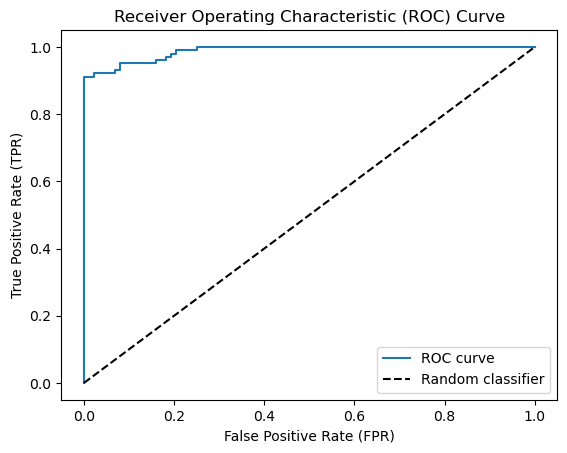

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Inferences: 

* The dataset has been split into training and testing sets. The training set (X_train) has 756 samples with 30 features, and the corresponding target labels (y_train) have 756 elements. The testing set (X_test) has 190 samples with 30 features, and the corresponding target labels (y_test) have 190 elements.


* The best model achieved in the process is a pipeline that contains an **XGBoost classifier** (XGBClassifier). XGBoost is an ensemble learning method known for its high performance in various machine learning tasks.


#### The hyperparameters of the best model are as follows:

*Learning rate: 0.1
Maximum depth of the individual decision trees: 3
Number of boosting rounds (trees) in the ensemble: 200

#### The performance of the best model on the test set is as follows:

* Accuracy: 93.16%

* The classification report provides precision, recall, and F1-score for both classes (0.0 and 1.0), as well as their support (number of samples).

* The macro average F1-score is 0.93, indicating a good overall performance on both classes.

* The weighted average F1-score is also 0.93, which means that the model is well-balanced in handling both classes, given their different support sizes.

* The AUC-ROC (Area Under the Receiver Operating Characteristic curve) score is 0.93, indicating good overall predictive performance.

* The model performs well on both classes (0 and 1) with high precision, recall, and F1-score values for both. It shows a slightly higher recall for class 0 (0.94) compared to class 1 (0.92).


> The model's accuracy of 93.16% indicates that it makes correct predictions for a large portion of the test set.

> The AUC-ROC score of 0.93 suggests that the model's ability to distinguish between the two classes is excellent.